In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pandas as pd

In [2]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [4]:
clf.predict([[2., 2.]])
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [5]:
from sklearn.datasets import load_diabetes
from sklearn import tree
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5708001330007915, 0.9807692307692307, 'X[8] <= -0.005\ngini = 0.994\nsamples = 442\nvalue = [1, 1, 1, 2, 1, 3, 1, 1, 1, 2, 3, 3, 1, 3\n4, 4, 1, 4, 1, 1, 4, 3, 2, 4, 3, 4, 2, 2\n3, 3, 2, 5, 6, 1, 2, 2, 4, 3, 1, 1, 2, 3\n4, 4, 1, 2, 4, 2, 5, 4, 2, 2, 3, 2, 4, 4\n1, 2, 1, 3, 3, 2, 4, 2, 1, 4, 2, 3, 3, 1\n2, 2, 3, 1, 2, 2, 1, 2, 1, 1, 2, 4, 3, 4\n2, 2, 2, 1, 2, 2, 2, 2, 3, 4, 2, 4, 1, 1\n1, 1, 4, 3, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2\n2, 1, 1, 3, 3, 1, 2, 2, 2, 1, 1, 5, 2, 2\n2, 3, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 2, 2\n3, 1, 6, 1, 4, 2, 1, 1, 1, 1, 3, 1, 1, 2\n2, 4, 1, 1, 2, 1, 2, 2, 3, 2, 1, 2, 1, 3\n2, 1, 2, 2, 3, 1, 3, 1, 2, 3, 3, 1, 2, 2\n1, 3, 2, 2, 2, 1, 1, 4, 1, 2, 1, 1, 4, 2\n1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1\n1, 1, 1, 1]'),
 Text(0.2792138991013072, 0.9423076923076923, 'X[6] <= 0.032\ngini = 0.989\nsamples = 216\nvalue = [1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 3, 1, 3\n3, 4, 1, 4, 0, 0, 4, 3, 2, 4, 3, 4, 1, 1\n2, 2, 2, 5, 6, 0, 1, 2, 4, 1, 1, 1, 2, 2\n2, 2, 0, 2, 3, 2, 3, 1, 2, 1

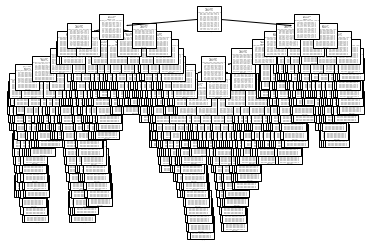

In [6]:
 tree.plot_tree(clf)

In [15]:
data = pd.read_csv('diabetes.csv')

In [16]:
data.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Pregnancies'] = encoder.fit_transform(data['Pregnancies'].values)
data['Glucose'] = encoder.fit_transform(data['Glucose'].values)
data['BloodPressure'] = encoder.fit_transform(data['BloodPressure'].values)
data['SkinThickness'] = encoder.fit_transform(data['SkinThickness'].values)
data['Insulin'] = encoder.fit_transform(data['Insulin'].values)
data['BMI'] = encoder.fit_transform(data['BMI'].values)
data['DiabetesPedigreeFunction'] = encoder.fit_transform(data['DiabetesPedigreeFunction'].values)
data['Age'] = encoder.fit_transform(data['Age'].values)
data['Outcome'] = encoder.fit_transform(data['Outcome'].values)

In [18]:
atr_data = data.drop(columns='Outcome')
atr_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,86,22,28,0,123,350,29
1,1,23,19,22,0,62,196,10
2,8,121,17,0,0,30,368,11
3,1,27,19,16,62,77,53,0
4,0,75,4,28,102,209,514,12


In [20]:
X = data.drop("Outcome", axis=1)  
y = data["Outcome"]

In [21]:
clf = DecisionTreeClassifier(random_state=42)

In [22]:
clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [23]:
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns.tolist(), 
                           class_names=["No Diabetes", "Diabetes"],  
                           filled=True, rounded=True,  
                           special_characters=True) 

In [24]:
graph = graphviz.Source(dot_data)

In [25]:
graph.render("diabetes_decision_tree", view=True)

'diabetes_decision_tree.pdf'